In [2]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [3]:
def load_dataframe(path=None, nrows=100000):
    if not path:
        path = '~/data_analysis/data/tappware/dnothi/users.csv'
    return pd.read_csv(path, nrows=nrows)

In [4]:
df = load_dataframe()
df.shape

/tmp/ipykernel_10390/89747571.py:4: DtypeWarning: Columns (1,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, nrows=nrows)


(100000, 21)

In [4]:
df.head()

,id,username,password,user_alias,hash_change_password,user_role_id,is_admin,active,user_status,is_email_verified,email_verify_code,verification_date,ssn,force_password_change,last_password_change,created,modified,created_by,modified_by,photo,employee_record_id
0,1,superman,$2y$10$DgTkdt8bX1gNJOeO1PHzO.33k0tuLB7GuootzYv...,superman,NaN,1,0,1,registered,1.0,123,0000-00-00,123.0,1.0,2020-10-14 10:58:48,0000-00-00 00:00:00,2020-10-14 10:58:48,NaN,NaN,NaN,NaN
1,2,admin,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,admin,NaN,2,0,1,NaN,0.0,NaN,0000-00-00,NaN,1.0,0000-00-00 00:00:00,0000-00-00 00:00:00,2018-04-19 10:30:42,NaN,NaN,NaN,NaN
2,48,200000000002,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,200000000002,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-06 13:19:58,0000-00-00 00:00:00,2016-02-06 13:19:58,NaN,NaN,NaN,30.0
3,49,200000000003,$2y$10$M14gp5AH90r4tz06nhkml.eggt8pcpx1Um3FNC9...,Raziul,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-11 10:09:21,0000-00-00 00:00:00,2016-10-25 12:59:33,NaN,NaN,NaN,31.0
4,52,200000000004,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,200000000004,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-06 13:19:58,0000-00-00 00:00:00,2016-11-27 16:35:01,NaN,NaN,NaN,34.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  int64  
 1   username               99999 non-null   object 
 2   password               100000 non-null  object 
 3   user_alias             91555 non-null   object 
 4   hash_change_password   1 non-null       object 
 5   user_role_id           100000 non-null  int64  
 6   is_admin               100000 non-null  int64  
 7   active                 100000 non-null  int64  
 8   user_status            99994 non-null   object 
 9   is_email_verified      99998 non-null   float64
 10  email_verify_code      7478 non-null    object 
 11  verification_date      53592 non-null   object 
 12  ssn                    38 non-null      float64
 13  force_password_change  99997 non-null   float64
 14  last_password_change   84689 non-null

### General Insights / General questions we can answer:
- কোন নির্দিষ্ট সালে/মাসে/দিনে কতজন ব্যবহারকারী নথি সিস্টেম এ যুক্ত হয়েছেন।
- কতজন ব্যবহারকারী পূর্বে নথি ব্যবহার করতেন বর্তমানে ব্যবহার করছেন না।

### Business Insights / Questions we can explore:
- কিছু ব্যবহারকারী বর্তমানে নথি ব্যবহার না করার কারন খুজে দেখা যেতে পারে।


## Analysis: Users registration trend

In [8]:
# df.created.describe()
df_created = df.copy(deep=True)
df_created['created'] = pd.to_datetime(df_created['created'], errors='coerce').fillna(method='bfill')
df_trend = df_created.groupby(df_created.created.dt.year).size().reset_index(name='counts')
df_trend['counts'] = df_trend.counts.cumsum()
df_trend

,created,counts
0,2015,44
1,2016,17277
2,2017,42618
3,2018,65380
4,2019,86782
5,2020,98235
6,2021,100000


<BarContainer object of 7 artists>

Text(0.5, 0, 'years')

Text(0, 0.5, 'No of Users')

Text(0.5, 1.0, 'users registered trend')

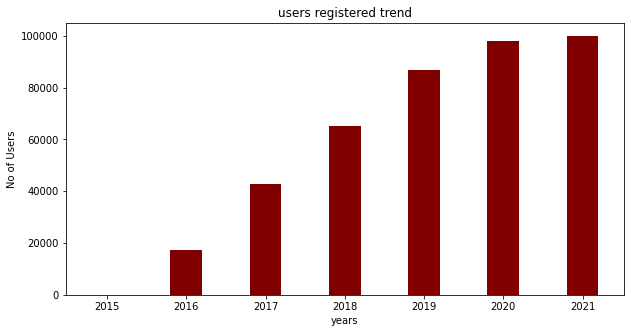

In [9]:
years = df_trend.created
registered_users = df_trend.counts
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years, registered_users, color ='maroon',
        width = 0.4)
 
plt.xlabel("years")
plt.ylabel("No of Users")
plt.title("users registered trend")
plt.show()

In [43]:
df_trend.index.tolist()
df_trend.created.tolist()

[0, 1, 2, 3, 4, 5, 6]

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

<AxesSubplot:>

([<matplotlib.axis.XTick at 0x7f3f44616400>,
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021')])

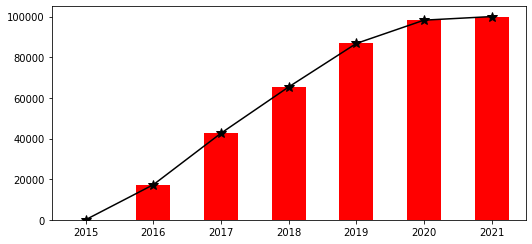

In [45]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = df_trend['counts'].plot(kind='bar', color='red')
xtick_location = df_trend.index.tolist()
xtick_labels = df_trend.created.tolist()
df_trend['counts'].plot(kind='line', marker='*', color='black', ms=10)
plt.xticks(ticks = xtick_location, labels=xtick_labels)

plt.show()

In [23]:
dff = df.copy(deep=True)
dff['created'] = pd.to_datetime(dff['created'], errors='coerce').fillna(method='bfill')
dff = dff.groupby(dff.created.dt.date).size().reset_index(name='counts')
dff['counts'] = dff.counts.cumsum()
dff

,created,counts
0,2015-12-30,12
1,2015-12-31,44
2,2016-01-01,75
3,2016-01-02,76
4,2016-01-07,77
...,...,...
1735,2021-03-04,99929
1736,2021-03-05,99937
1737,2021-03-06,99939
1738,2021-03-07,99988


<Figure size 1280x800 with 0 Axes>

Text(0.5, 1.0, 'User registration (2016 - 2021)')

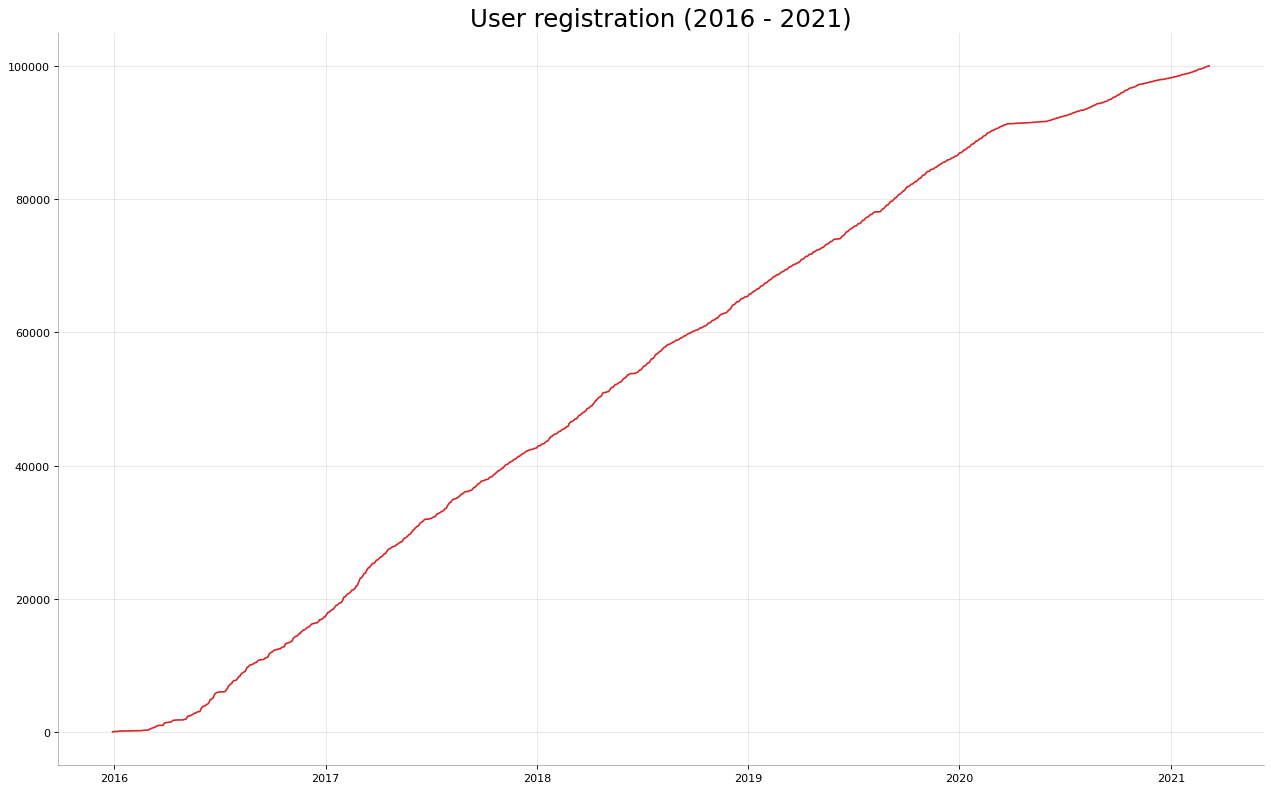

In [30]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('created', 'counts', data=dff, color='tab:red')
# plt.plot('date', 'value', data=df_traffic, color='tab:red')

# Decoration
# plt.yticks(fontsize=12, alpha=.7)
plt.title("User registration (2016 - 2021)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

## Analysis: Active vs Deactivate Users

In [20]:
# df.active.value_counts().values
df.groupby('active').size().reset_index(name='counts')

,active,counts
0,0,108
1,1,99892


([<matplotlib.patches.Wedge at 0x7f3f4cb64a60>,
 [Text(-1.0999936687323066, 0.003732123904754006, 'Active'),
  Text(1.0999936690066583, -0.0037320430424225164, 'Deactive')],
 [Text(-0.5999965465812581, 0.0020357039480476393, '100%'),
  Text(0.5999965467309044, -0.0020356598413213724, '0%')])

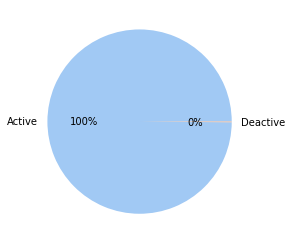

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = df.active.value_counts().values
labels = ['Active', 'Deactive',]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [141]:
# df.created_by.value_counts()
# df.modified_by.value_counts()
df.head()

df.user_status.value_counts()

,id,username,password,user_alias,hash_change_password,user_role_id,is_admin,active,user_status,is_email_verified,email_verify_code,verification_date,ssn,force_password_change,last_password_change,created,modified,created_by,modified_by,photo,employee_record_id
0,1,superman,$2y$10$DgTkdt8bX1gNJOeO1PHzO.33k0tuLB7GuootzYv...,superman,NaN,1,0,1,registered,1.0,123,0000-00-00,123.0,1.0,2020-10-14 10:58:48,0000-00-00 00:00:00,2020-10-14 10:58:48,NaN,NaN,NaN,NaN
1,2,admin,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,admin,NaN,2,0,1,NaN,0.0,NaN,0000-00-00,NaN,1.0,0000-00-00 00:00:00,0000-00-00 00:00:00,2018-04-19 10:30:42,NaN,NaN,NaN,NaN
2,48,200000000002,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,200000000002,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-06 13:19:58,0000-00-00 00:00:00,2016-02-06 13:19:58,NaN,NaN,NaN,30.0
3,49,200000000003,$2y$10$M14gp5AH90r4tz06nhkml.eggt8pcpx1Um3FNC9...,Raziul,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-11 10:09:21,0000-00-00 00:00:00,2016-10-25 12:59:33,NaN,NaN,NaN,31.0
4,52,200000000004,$2y$10$vMlROpUDbCf8gdrBqGfpROUiT5Im97l9y1XOngB...,200000000004,NaN,3,0,1,registered,1.0,123,0000-00-00,123.0,0.0,2016-02-06 13:19:58,0000-00-00 00:00:00,2016-11-27 16:35:01,NaN,NaN,NaN,34.0


1             98242
1              1696
registered       37
0                19
Name: user_status, dtype: int64